In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from googleapiclient.discovery import build
from google.colab import auth

# Authenticate
auth.authenticate_user()

# Build the Google Drive service
drive_service = build('drive', 'v3')
file_dict = {}
# Specify the folder ID from the URL
folder_id = '1ijfQpSgwwTXSRtG4n4dOGT16CNVCDg8k'
dict_list = []
# List files in the folder
results = drive_service.files().list(
    q=f"'{folder_id}' in parents",
    fields="files(id, name, mimeType)"
).execute()

# Print the list of files
for file in results.get('files', []):
    file_dict = { "Name": {file['name']}, "ID": {file['id']}, "Type": {file['mimeType']}}
    dict_list.append(file_dict)
    print(file_dict)
    print(f"Name: {file['name']}, ID: {file['id']}, Type: {file['mimeType']}")

{'Name': {'F_income_statement'}, 'ID': {'1crvi-RwV-j4FVq_4NZkI5CurqZhPz8IyPHooFkwGVVU'}, 'Type': {'application/vnd.google-apps.spreadsheet'}}
Name: F_income_statement, ID: 1crvi-RwV-j4FVq_4NZkI5CurqZhPz8IyPHooFkwGVVU, Type: application/vnd.google-apps.spreadsheet
{'Name': {'F_income_statement'}, 'ID': {'1AfpWnDrfi4FzyhZJzj-jpFAopRfqQy5ikLT5L3zALoE'}, 'Type': {'application/vnd.google-apps.spreadsheet'}}
Name: F_income_statement, ID: 1AfpWnDrfi4FzyhZJzj-jpFAopRfqQy5ikLT5L3zALoE, Type: application/vnd.google-apps.spreadsheet
{'Name': {'F_income_statement'}, 'ID': {'1d-b3ZED8W4x7ps6NA6Q3qWgLQM4KSuy0ro2BKBGcvGk'}, 'Type': {'application/vnd.google-apps.spreadsheet'}}
Name: F_income_statement, ID: 1d-b3ZED8W4x7ps6NA6Q3qWgLQM4KSuy0ro2BKBGcvGk, Type: application/vnd.google-apps.spreadsheet
{'Name': {'F_income_statement'}, 'ID': {'1PrfAlg_gbs8qTAHKpZ9RWK5klkJXHJnmzZbuEp5gitM'}, 'Type': {'application/vnd.google-apps.spreadsheet'}}
Name: F_income_statement, ID: 1PrfAlg_gbs8qTAHKpZ9RWK5klkJXHJnmzZb

In [ ]:
!pip install gspread

In [ ]:
# Extract only the "Name" values
# names = [item['Name'].pop() for item in dict_list]
yearly_sheet_id = [{'Name': d['Name'].pop(), 'ID': d['ID'].pop(), 'Type':  d['Type'].pop()} for d in dict_list]
print(yearly_sheet_id)

[{'Name': 'F_income_statement', 'ID': '1crvi-RwV-j4FVq_4NZkI5CurqZhPz8IyPHooFkwGVVU', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1AfpWnDrfi4FzyhZJzj-jpFAopRfqQy5ikLT5L3zALoE', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1d-b3ZED8W4x7ps6NA6Q3qWgLQM4KSuy0ro2BKBGcvGk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1PrfAlg_gbs8qTAHKpZ9RWK5klkJXHJnmzZbuEp5gitM', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1t7F2TewWMJwk2vmTRnFp6kgJ54A-43f8gCKkW9oSvJw', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1kz5YbTlaU9YKjbJbj9Nqo1IjzfSlSHT_OLWh3Umcj8k', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1-tou3TehMH_1NmvObbhk59Ppk9Y6mM_4g33kv9O6FBY', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'F_income_statement', 'ID': '1E

In [ ]:
file_year = []
# Create a new list containing items with the letter "A"
file_year = [item for item in yearly_sheet_id if 'A' in item["Name"]]

print(file_year)

[{'Name': 'Report_2012_A', 'ID': '1QDc2_7G6DtQDmvsf4samZD710mnQNG5DJ2ulSSuQ_O8', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2021_A', 'ID': '1RovdvvlQEUXmndfeL0iqofd863xPRuHcsWNl8XZ670s', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2020_A', 'ID': '19M0pJ-olv7XDlRLt5Qyp2grotKw9PJisVLnimzZX5PU', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2019_A', 'ID': '1VhWLQSf9x8cdwJqaz96d5YxY089LQQCcSfy6Z6Uz6jk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2018_A', 'ID': '19Pp5k0ZqKICec-53Oh5ElNBrWmvxT25rJ953EkrRTMk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2017_A', 'ID': '1DLionuMvmDCqQCV8rL7TXOTvzawIUiVCTWBJLoJ9g6I', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2015_A', 'ID': '13sTutJElpvDTI6EJ9_MtCvkpEc9vUFxqJXchewRdtKk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2018_A', 'ID': '1ZaejOIB9HqC5q3BphHQg-jKyooJ4sqC6OxxG6o8qK

In [ ]:
def remove_duplicates_by_key(data, key):
    seen = set()
    file_year_list = []
    for item in data:
        value = item[key]
        if value not in seen:
            seen.add(value)
            print(item[key])
            file_year_list.append(item)
    return file_year_list


file_year_list = remove_duplicates_by_key(file_year, key='Name')
# print(file_year_list)

Report_2012_A
Report_2021_A
Report_2020_A
Report_2019_A
Report_2018_A
Report_2017_A
Report_2015_A
Report_2016_A
Report_2011_A
Report_2013_A
Report_2014_A


In [ ]:
print(file_year_list)

[{'Name': 'Report_2012_A', 'ID': '1QDc2_7G6DtQDmvsf4samZD710mnQNG5DJ2ulSSuQ_O8', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2021_A', 'ID': '1RovdvvlQEUXmndfeL0iqofd863xPRuHcsWNl8XZ670s', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2020_A', 'ID': '19M0pJ-olv7XDlRLt5Qyp2grotKw9PJisVLnimzZX5PU', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2019_A', 'ID': '1VhWLQSf9x8cdwJqaz96d5YxY089LQQCcSfy6Z6Uz6jk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2018_A', 'ID': '19Pp5k0ZqKICec-53Oh5ElNBrWmvxT25rJ953EkrRTMk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2017_A', 'ID': '1DLionuMvmDCqQCV8rL7TXOTvzawIUiVCTWBJLoJ9g6I', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2015_A', 'ID': '13sTutJElpvDTI6EJ9_MtCvkpEc9vUFxqJXchewRdtKk', 'Type': 'application/vnd.google-apps.spreadsheet'}, {'Name': 'Report_2016_A', 'ID': '1T9wToUy_rAMzJLgGDq6R23CCieq21vm26jvcHFzss

In [ ]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
import re
# Open the Google Sheets file

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
service = build('drive', 'v3', credentials=creds)
get_sheets= pd.DataFrame()

# json_key_path = '/content/sample_data/credentials (2).json'
# # Authorize using the JSON key file
# scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
# creds1 = ServiceAccountCredentials.from_json_keyfile_name(json_key_path, scope)
# gc1 = gspread.authorize(creds1)

google_sheet_format  = []

all_year_data = {}
all_year_list = []
def get_sheet_name(worksheet):


  # Use a regular expression to extract the sheet name
  match = re.search(r"<Worksheet '(.*?)'", worksheet)

  if match:
      sheet_name = match.group(1)
      print(sheet_name)
      return
  else:
      print("Sheet name not found.")

def get_year(file_name):
  # Use regular expression to extract the year
  print(file_name)
  parts = file_name.split('_')
  if len(parts) >= 2:
      year = parts[1]
      print(year)
      return year
  else:
      print("Year not found in the string.")

for file_year in range(0, len(file_year_list)):
  print(file_year_list[file_year]['Name'])
  if file_year_list[file_year]['Type'] == 'application/vnd.google-apps.spreadsheet':
    year = get_year(str(file_year_list[file_year]['Name']))
    for sheet in range(0,4):
      sh = gc.open(file_year_list[file_year]['Name']).get_worksheet(sheet)
      sheet = sh.get_all_values()

      # Convert to DataFrame
      sheets = pd.DataFrame(sheet[1:], columns=sheet[0])
      sheets = sheets.dropna(axis=1, how='all')
      #sheet = sheet.drop('', axis=1)
      # Convert DataFrame to a list of dictionaries
      list_of_dicts = sheets.to_dict(orient='records')
      print(f"\n ********************************************* \n")
      all_year_data = { 'year'  : year,
                              'sheets_name': sh.title,
                                'sheet': list_of_dicts
                            }
      all_year_list.append(all_year_data)
      print(sheets)
      print(list_of_dicts)


  # #elif file_year_list[file_year]['Type'] == 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'
  else:
      if file_year_list[file_year]['ID'] not in google_sheet_format:
        file = service.files().copy(fileId=file_year_list[file_year]['ID'], body={"mimeType":"application/vnd.google-apps.spreadsheet"}).execute()
        google_sheet_format.append(file_year_list[file_year]['ID'])
        year = get_year(str(file_year_list[file_year]['Name']))
        for sheet in range(0,4):
          sh = gc.open(file['name']).get_worksheet(sheet)

          sheet = sh.get_all_values()

          # Convert to DataFrame
          sheets = pd.DataFrame(sheet[1:], columns=sheet[0])
          sheets = sheets.dropna(axis=1, how='all')
          # Convert DataFrame to a list of dictionaries
          list_of_dicts = sheets.to_dict(orient='records')
          # Add a new column for the worksheet name
          # Print the DataFrame
          print(f"\n ********************************************* \n")
          all_year_data = { 'year'  : year,
                              'sheets_name': sh.title,
                                'sheet': list_of_dicts
                            }

          all_year_list.append(all_year_data)


Report_2012_A
Report_2012_A
2012

 ********************************************* 

                                      Group     Moto    Auto  Finance Other  \
0                         Revenues   76,848   70,208   1,490   19,550     5   
1                      CostOfSales  -61,354  -56,525  -1,236  -16,984     -   
2                      GrossProfit   15,494   13,683     254    2,566     5   
3  ProfitLossBeforeFinancialResult    8,300    7,624       9    1,558    58   
4                  FinancialResult     -481     -429      -3        3   -64   
5              ProfitLossBeforeTax    7,819    7,195       6    1,561    -6   
6                      IncomeTaxes   -2,697   -2,458     -22     -545     5   
7                    NetProfitLoss    5,122    4,737     -16    1,016    -1   

  Elimination  
0     -14,405  
1      13,391  
2      -1,014  
3        -949  
4          12  
5        -937  
6         323  
7        -614  
[{'': 'Revenues', 'Group': '76,848', 'Moto': '70,208', 'Auto'

In [ ]:
print(get_sheets)

                                      Group     Auto    Moto  Finance Other  \
0                         Revenues   80,401   75,173   1,679   20,599     7   
1                      CostOfSales  -63,396  -61,221  -1,365  -17,783     -   
2                      GrossProfit   17,005   13,952     314    2,816     7   
3  ProfitLossBeforeFinancialResult    9,118    7,244     112    1,756    71   
4                  FinancialResult     -411     -358      -5      -33    83   
5              ProfitLossBeforeTax    8,707    6,886     107    1,723   154   
6                      IncomeTaxes   -2,890   -2,365     -34     -525   -49   
7                    NetProfitLoss    5,817    4,521      73    1,198   105   

  Elimination  
0     -17,057  
1      16,973  
2         -84  
3         -65  
4         -98  
5        -163  
6          83  
7         -80  


In [ ]:
# Delete the first column (index 0) from df
df_without_first_column = get_sheets.drop(get_sheets.columns[0], axis=1)
print(df_without_first_column)
# Print the resulting DataFrame
print(df_without_first_column.T)
df_without_first_column = df_without_first_column.T

     Group     Auto    Moto  Finance Other Elimination
0   80,401   75,173   1,679   20,599     7     -17,057
1  -63,396  -61,221  -1,365  -17,783     -      16,973
2   17,005   13,952     314    2,816     7         -84
3    9,118    7,244     112    1,756    71         -65
4     -411     -358      -5      -33    83         -98
5    8,707    6,886     107    1,723   154        -163
6   -2,890   -2,365     -34     -525   -49          83
7    5,817    4,521      73    1,198   105         -80
                   0        1       2      3     4      5       6      7
Group         80,401  -63,396  17,005  9,118  -411  8,707  -2,890  5,817
Auto          75,173  -61,221  13,952  7,244  -358  6,886  -2,365  4,521
Moto           1,679   -1,365     314    112    -5    107     -34     73
Finance       20,599  -17,783   2,816  1,756   -33  1,723    -525  1,198
Other              7        -       7     71    83    154     -49    105
Elimination  -17,057   16,973     -84    -65   -98   -163      83  

In [ ]:
# Set the specified column as the index
df_without_first_column = df_without_first_column.rename_axis('Year')

# Print the resulting DataFrame
print(df_without_first_column)

                   0        1       2      3     4      5       6      7
Year                                                                    
Group         80,401  -63,396  17,005  9,118  -411  8,707  -2,890  5,817
Auto          75,173  -61,221  13,952  7,244  -358  6,886  -2,365  4,521
Moto           1,679   -1,365     314    112    -5    107     -34     73
Finance       20,599  -17,783   2,816  1,756   -33  1,723    -525  1,198
Other              7        -       7     71    83    154     -49    105
Elimination  -17,057   16,973     -84    -65   -98   -163      83    -80


In [ ]:
# Reset the index to make 'Year' a regular column
df_reset = df_without_first_column.reset_index()

# Print the resulting DataFrame
print(df_reset)

          Year        0        1       2      3     4      5       6      7
0        Group   80,401  -63,396  17,005  9,118  -411  8,707  -2,890  5,817
1         Auto   75,173  -61,221  13,952  7,244  -358  6,886  -2,365  4,521
2         Moto    1,679   -1,365     314    112    -5    107     -34     73
3      Finance   20,599  -17,783   2,816  1,756   -33  1,723    -525  1,198
4        Other        7        -       7     71    83    154     -49    105
5  Elimination  -17,057   16,973     -84    -65   -98   -163      83    -80


In [ ]:
# Extract columns from axis 0 to 7 into a new DataFrame
new_df = df_reset.iloc[:, 1:].copy()

# Print the resulting DataFrame
print(new_df)

         0        1       2      3     4      5       6      7
0   80,401  -63,396  17,005  9,118  -411  8,707  -2,890  5,817
1   75,173  -61,221  13,952  7,244  -358  6,886  -2,365  4,521
2    1,679   -1,365     314    112    -5    107     -34     73
3   20,599  -17,783   2,816  1,756   -33  1,723    -525  1,198
4        7        -       7     71    83    154     -49    105
5  -17,057   16,973     -84    -65   -98   -163      83    -80


In [ ]:
income_statement_features = ['Revenues', 'CostOfSales', 'GrossProfit', 'ProfitLossBeforeFinancialResult', 'FinancialResult', 'ProfitLossBeforeTax', 'IncomeTaxes', 'NetProfitLoss']
new_df.columns = income_statement_features

In [ ]:
print(new_df)

  Revenues CostOfSales GrossProfit ProfitLossBeforeFinancialResult  \
0   80,401     -63,396      17,005                           9,118   
1   75,173     -61,221      13,952                           7,244   
2    1,679      -1,365         314                             112   
3   20,599     -17,783       2,816                           1,756   
4        7           -           7                              71   
5  -17,057      16,973         -84                             -65   

  FinancialResult ProfitLossBeforeTax IncomeTaxes NetProfitLoss  
0            -411               8,707      -2,890         5,817  
1            -358               6,886      -2,365         4,521  
2              -5                 107         -34            73  
3             -33               1,723        -525         1,198  
4              83                 154         -49           105  
5             -98                -163          83           -80  


In [ ]:
# Columns to delete
columns_to_delete = ['Group', 'Auto', 'Moto', 'Finance', 'Other', 'Elimination']

# Delete specified columns from df
df_without_columns = df.drop(columns=columns_to_delete)

# Print the resulting DataFrame
print(df_without_columns)

KeyError: ignored

In [ ]:
rows_to_exclude = ['Group', 'Auto', 'Moto', 'Finance', 'Other', 'Elimination']
# Exclude rows from df where the value in the "Group" column is in rows_to_exclude
df_filtered = get_sheets[~get_sheets['Group'].isin(rows_to_exclude)].reset_index(drop=True)

# Print the resulting DataFrame
print(df_filtered)

                                      Group     Auto    Moto  Finance Other  \
0                         Revenues   80,401   75,173   1,679   20,599     7   
1                      CostOfSales  -63,396  -61,221  -1,365  -17,783     -   
2                      GrossProfit   17,005   13,952     314    2,816     7   
3  ProfitLossBeforeFinancialResult    9,118    7,244     112    1,756    71   
4                  FinancialResult     -411     -358      -5      -33    83   
5              ProfitLossBeforeTax    8,707    6,886     107    1,723   154   
6                      IncomeTaxes   -2,890   -2,365     -34     -525   -49   
7                    NetProfitLoss    5,817    4,521      73    1,198   105   

  Elimination  
0     -17,057  
1      16,973  
2         -84  
3         -65  
4         -98  
5        -163  
6          83  
7         -80  


In [ ]:
get_sheets = get_sheets.T
print(get_sheets)

                                      Group     Auto    Moto  Finance Other  \
0                         Revenues   80,401   75,173   1,679   20,599     7   
1                      CostOfSales  -63,396  -61,221  -1,365  -17,783     -   
2                      GrossProfit   17,005   13,952     314    2,816     7   
3  ProfitLossBeforeFinancialResult    9,118    7,244     112    1,756    71   
4                  FinancialResult     -411     -358      -5      -33    83   
5              ProfitLossBeforeTax    8,707    6,886     107    1,723   154   
6                      IncomeTaxes   -2,890   -2,365     -34     -525   -49   
7                    NetProfitLoss    5,817    4,521      73    1,198   105   

  Elimination  
0     -17,057  
1      16,973  
2         -84  
3         -65  
4         -98  
5        -163  
6          83  
7         -80  


In [ ]:
get_sheets = get_sheets.iloc[1:].T
print(get_sheets)


     Group     Auto    Moto  Finance Other Elimination
1  -63,396  -61,221  -1,365  -17,783     -      16,973
2   17,005   13,952     314    2,816     7         -84
3    9,118    7,244     112    1,756    71         -65
4     -411     -358      -5      -33    83         -98
5    8,707    6,886     107    1,723   154        -163
6   -2,890   -2,365     -34     -525   -49          83
7    5,817    4,521      73    1,198   105         -80


In [ ]:
import pandas as pd

# Creating Dim-Segment table
dim_segment = pd.DataFrame({
    'Segment': ['Group', 'Auto', 'Moto', 'Finance','Other','Elimination'],
    'segment_id': [0, 1, 2, 3, 4, 5]
})

income_statement_features = ['Revenues', 'CostOfSales', 'GrossProfit', 'ProfitLossBeforeFinancialResult', 'FinancialResult', 'ProfitLossBeforeTax', 'IncomeTaxes', 'NetProfitLoss']

for year in range(2011, 2022):
    # Skip the first row (original headers) and transpose
    get_sheets = get_sheets.iloc[1:].T
    print(sheets)
    # Remove the row with original column names
    get_sheets = get_sheets.iloc[1:]

    get_sheets.columns = income_statement_features

    # Initialize segment_id counter
    segment_id = 0

    for index, row in sheets.iterrows():
        get_sheets.at[index, 'segment_id'] = segment_id
        segment_id = (segment_id + 1) % len(dim_segment)  # Increment and loop back to 0 if needed


    get_sheets['year'] = year

    if year == 2011:
        df_income_statement = get_sheets
    else:
        df_income_statement = pd.concat([df_income_statement, get_sheets])

# Save the DataFrame to a CSV file
csv_file_path = "F_income_statement"
df_income_statement.to_csv('F-IncomeStatement.csv', index=False)


# Upload the CSV file to Google Drive
file_metadata = {
    'name': csv_file_path,
    'mimeType': 'application/vnd.google-apps.spreadsheet',
    'parents': [folder_id]
}

media = MediaFileUpload(csv_file_path, mimetype='application/vnd.ms-excel')

file =  service.files().create(body=file_metadata, media_body=media, fields='id').execute()


# Print the link to the file
print('File ID: %s' % file.get('id'))

# Dim-Time and Dim-Segment tables
dim_time = pd.DataFrame({'year': range(2011, 2022)})
dim_time.to_csv('Dim-Time.csv', index=False)
dim_segment.to_csv('Dim-Segment.csv', index=False)








                                                     Group Auto    Moto  \
0                    CashIOFromOperatingActivities   2,912        9,423   
1                    CashIOFromInvestingActivities  -6,116       -5,836   
2                    CashIOFromFinancingActivities   3,133       -4,682   
3             EffectExchangeRateCashandEquivalents      86           70   
4  EffectChangesCompositionGroupCashandEquivalents       2            2   
5                         ChangeCaseandEquivalents      17       -1,023   
6                          CashandEquivalentsStart   7,671        6,775   
7                            CashandEquivalentsEnd   7,688        5,752   

  Finance Other Elimination  
0  -4,715                    
1    -297                    
2   5,927                    
3     -11                    
4       -                    
5     904                    
6     879                    
7   1,783                    


ValueError: ignored

In [ ]:
print(all_year_list)

[{'year': '2012', 'sheets_name': 'F-IncomeStatement', 'sheet': [{'': 'Revenues', 'Group': '76,848', 'Moto': '70,208', 'Auto': '1,490', 'Finance': '19,550', 'Other': '5', 'Elimination': '-14,405'}, {'': 'CostOfSales', 'Group': '-61,354', 'Moto': '-56,525', 'Auto': '-1,236', 'Finance': '-16,984', 'Other': '-', 'Elimination': '13,391'}, {'': 'GrossProfit', 'Group': '15,494', 'Moto': '13,683', 'Auto': '254', 'Finance': '2,566', 'Other': '5', 'Elimination': '-1,014'}, {'': 'ProfitLossBeforeFinancialResult', 'Group': '8,300', 'Moto': '7,624', 'Auto': '9', 'Finance': '1,558', 'Other': '58', 'Elimination': '-949'}, {'': 'FinancialResult', 'Group': '-481', 'Moto': '-429', 'Auto': '-3', 'Finance': '3', 'Other': '-64', 'Elimination': '12'}, {'': 'ProfitLossBeforeTax', 'Group': '7,819', 'Moto': '7,195', 'Auto': '6', 'Finance': '1,561', 'Other': '-6', 'Elimination': '-937'}, {'': 'IncomeTaxes', 'Group': '-2,697', 'Moto': '-2,458', 'Auto': '-22', 'Finance': '-545', 'Other': '\u200a5', 'Elimination':

In [ ]:
# Create a set to keep track of seen years
seen_years = set()

# Filter out duplicate entries for the year 2019
filtered_entries = []
for entry in all_year_list:
    if entry["year"] not in seen_years:
        filtered_entries.append(entry)
        seen_years.add(entry["year"])


print(filtered_entries)
all_year_list = filtered_entries

[{'year': '2012', 'sheets_name': 'F-IncomeStatement', 'sheet': [{'': 'Revenues', 'Group': '76,848', 'Moto': '70,208', 'Auto': '1,490', 'Finance': '19,550', 'Other': '5', 'Elimination': '-14,405'}, {'': 'CostOfSales', 'Group': '-61,354', 'Moto': '-56,525', 'Auto': '-1,236', 'Finance': '-16,984', 'Other': '-', 'Elimination': '13,391'}, {'': 'GrossProfit', 'Group': '15,494', 'Moto': '13,683', 'Auto': '254', 'Finance': '2,566', 'Other': '5', 'Elimination': '-1,014'}, {'': 'ProfitLossBeforeFinancialResult', 'Group': '8,300', 'Moto': '7,624', 'Auto': '9', 'Finance': '1,558', 'Other': '58', 'Elimination': '-949'}, {'': 'FinancialResult', 'Group': '-481', 'Moto': '-429', 'Auto': '-3', 'Finance': '3', 'Other': '-64', 'Elimination': '12'}, {'': 'ProfitLossBeforeTax', 'Group': '7,819', 'Moto': '7,195', 'Auto': '6', 'Finance': '1,561', 'Other': '-6', 'Elimination': '-937'}, {'': 'IncomeTaxes', 'Group': '-2,697', 'Moto': '-2,458', 'Auto': '-22', 'Finance': '-545', 'Other': '\u200a5', 'Elimination':

-61,221
-57,771
-1,236
-50164.00
-70399
-71456
-71918
-72266
-70973
-78637
-78062


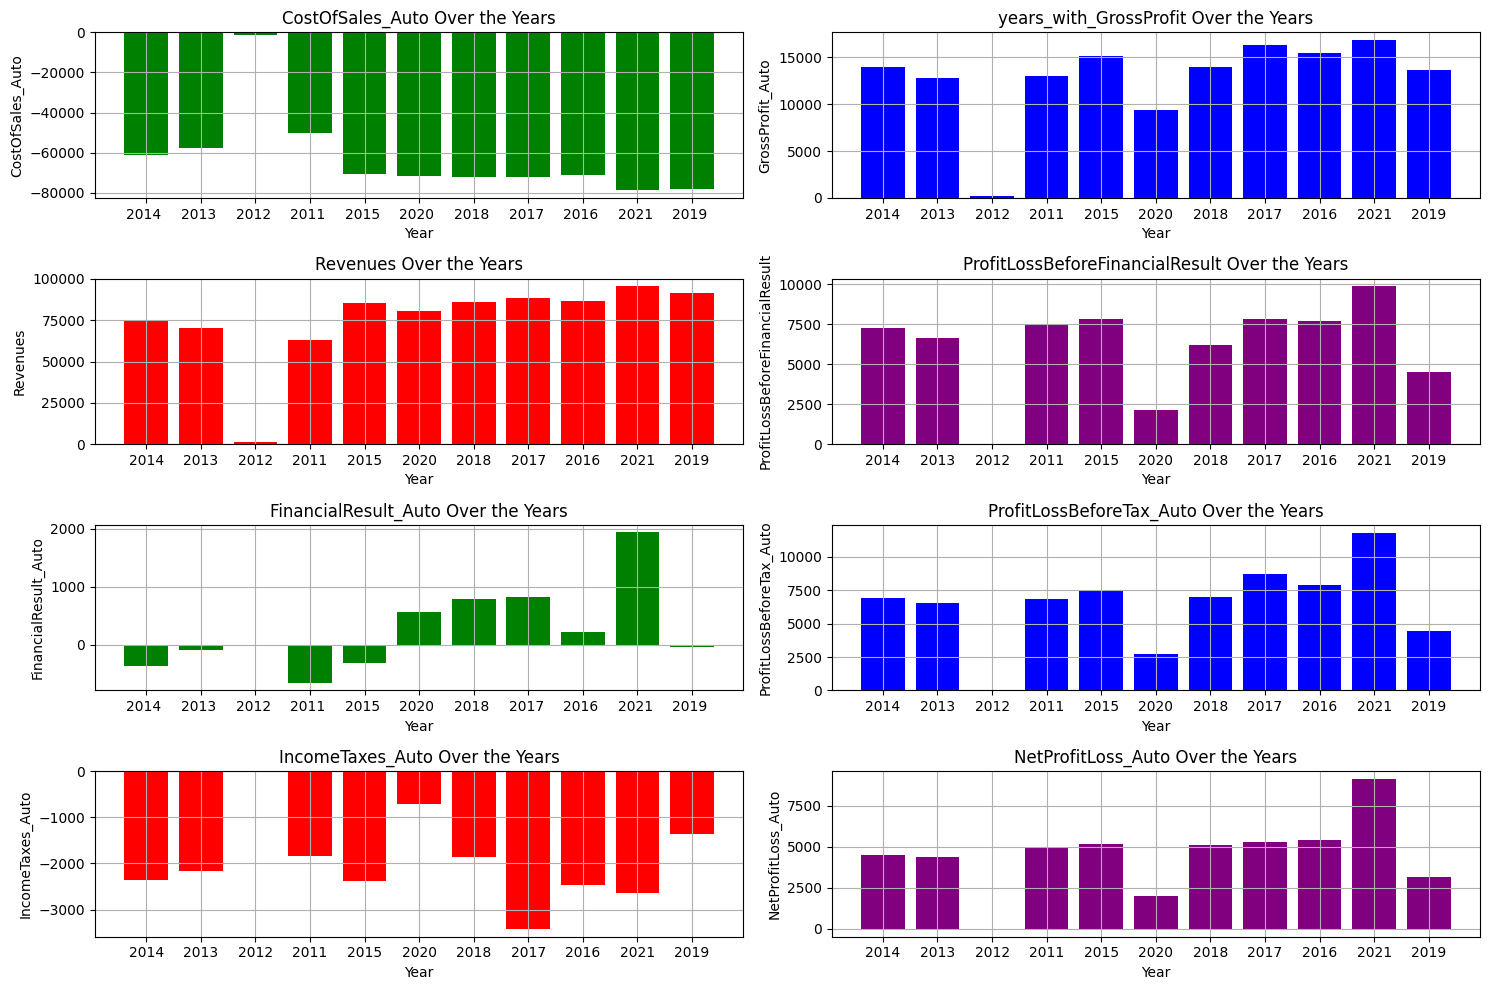

In [ ]:
import matplotlib.pyplot as plt

# Extract relevant data for plotting
revenues_Auto = []
years_with_revenues = []

years_with_CostOfSales = []
CostOfSales_Auto = []

years_with_GrossProfit = []
GrossProfit_Auto = []

years_with_ProfitLossBeforeFinancialResult = []
ProfitLossBeforeFinancialResult_Auto = []

years_with_FinancialResult=[]
FinancialResult_Auto= []

years_with_ProfitLossBeforeTax = []
ProfitLossBeforeTax_Auto= []

years_with_IncomeTaxes = []
IncomeTaxes_Auto= []
years_with_NetProfitLoss=[]
NetProfitLoss_Auto= []
for entry in all_year_list:
    for sheet_entry in entry["sheet"]:
        if sheet_entry.get("") == "Revenues":
            years_with_revenues.append(entry["year"])
            revenues_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "CostOfSales":
            years_with_CostOfSales.append(entry["year"])
            print(sheet_entry["Auto"])
            CostOfSales_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "GrossProfit":
            years_with_GrossProfit.append(entry["year"])
            GrossProfit_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeFinancialResult":
            years_with_ProfitLossBeforeFinancialResult.append(entry["year"])
            ProfitLossBeforeFinancialResult_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "FinancialResult":
            years_with_FinancialResult.append(entry["year"])
            FinancialResult_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeTax":
            years_with_ProfitLossBeforeTax.append(entry["year"])
            ProfitLossBeforeTax_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "IncomeTaxes":
            years_with_IncomeTaxes.append(entry["year"])
            IncomeTaxes_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "NetProfitLoss":
            years_with_NetProfitLoss.append(entry["year"])
            NetProfitLoss_Auto.append(float(sheet_entry["Auto"].replace(",", "")))


fig, axs = plt.subplots(4,2 ,figsize=(15, 10))

# Plot Revenues
axs[0, 0].bar([f"{year} " for year in years_with_CostOfSales], CostOfSales_Auto, color='green', label='Auto')
axs[0, 0].grid(True)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CostOfSales_Auto')
axs[0, 0].set_title('CostOfSales_Auto Over the Years')

# Plot CostOfSales
axs[0, 1].bar([f"{year}" for year in years_with_GrossProfit], GrossProfit_Auto, color='blue', label='Auto')
axs[0, 1].grid(True)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('GrossProfit_Auto')
axs[0, 1].set_title('years_with_GrossProfit Over the Years')

# Plot GrossProfit
axs[1, 0].bar([f"{year}" for year in years_with_revenues], revenues_Auto, color='red', label='Auto')
axs[1, 0].grid(True)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Revenues')
axs[1, 0].set_title('Revenues Over the Years')

# Plot ProfitLossBeforeFinancialResult
axs[1, 1].bar([f"{year}" for year in years_with_ProfitLossBeforeFinancialResult], ProfitLossBeforeFinancialResult_Auto, color='purple', label='Auto')
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('ProfitLossBeforeFinancialResult')
axs[1, 1].set_title('ProfitLossBeforeFinancialResult Over the Years')

# Plot Revenues
axs[2, 0].bar([f"{year} " for year in years_with_revenues], FinancialResult_Auto, color='green', label='Auto')
axs[2, 0].grid(True)
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('FinancialResult_Auto')
axs[2, 0].set_title('FinancialResult_Auto Over the Years')

# Plot CostOfSales
axs[2, 1].bar([f"{year}" for year in years_with_revenues], ProfitLossBeforeTax_Auto, color='blue', label='Auto')
axs[2, 1].grid(True)
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('ProfitLossBeforeTax_Auto')
axs[2, 1].set_title('ProfitLossBeforeTax_Auto Over the Years')

# Plot GrossProfit
axs[3, 0].bar([f"{year}" for year in years_with_revenues], IncomeTaxes_Auto, color='red', label='Auto')
axs[3, 0].grid(True)
axs[3, 0].set_xlabel('Year')
axs[3, 0].set_ylabel('IncomeTaxes_Auto')
axs[3, 0].set_title('IncomeTaxes_Auto Over the Years')

# Plot ProfitLossBeforeFinancialResult
axs[3, 1].bar([f"{year}" for year in years_with_revenues], NetProfitLoss_Auto, color='purple', label='Auto')
axs[3, 1].grid(True)
axs[3, 1].set_xlabel('Year')
axs[3, 1].set_ylabel('NetProfitLoss_Auto')
axs[3, 1].set_title('NetProfitLoss_Auto Over the Years')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
from googleapiclient.http import MediaFileUpload
# Extract relevant data for plotting
F_table = []
years_with_revenues = []
#Group list
revenues_group = []
CostOfSales_group = []
GrossProfit_group = []
ProfitLossBeforeFinancialResult_group = []
FinancialResult_group= []
ProfitLossBeforeTax_group= []
IncomeTaxes_group= []
NetProfitLoss_group= []



# Auto list
revenues_Auto = []
CostOfSales_Auto = []
GrossProfit_Auto = []
ProfitLossBeforeFinancialResult_Auto = []
FinancialResult_Auto= []
ProfitLossBeforeTax_Auto= []
IncomeTaxes_Auto= []
NetProfitLoss_Auto= []

# Moto list
revenues_Auto = []
CostOfSales_Auto = []
GrossProfit_Auto = []
ProfitLossBeforeFinancialResult_Auto = []
FinancialResult_Auto= []
ProfitLossBeforeTax_Auto= []
IncomeTaxes_Auto= []
NetProfitLoss_Auto= []

# Finance list
revenues_Auto = []
CostOfSales_Auto = []
GrossProfit_Auto = []
ProfitLossBeforeFinancialResult_Auto = []
FinancialResult_Auto= []
ProfitLossBeforeTax_Auto= []
IncomeTaxes_Auto= []
NetProfitLoss_Auto= []

for entry in all_year_list:
    for sheet_entry in entry["sheet"]:
        if sheet_entry.get("") == "Revenues":
            years_with_revenues.append(entry["year"])
            print(sheet_entry["Group"])
            revenues_group.append(float(sheet_entry["Group"].replace(",", "")))
            revenues_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "CostOfSales":
            CostOfSales_group.append(float(sheet_entry["Group"].replace(",", "")))
            CostOfSales_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "GrossProfit":
            GrossProfit_group.append(float(sheet_entry["Group"].replace(",", "")))
            GrossProfit_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeFinancialResult":
            ProfitLossBeforeFinancialResult_group.append(float(sheet_entry["Group"].replace(",", "")))
            ProfitLossBeforeFinancialResult_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "FinancialResult":
            FinancialResult_group.append(float(sheet_entry["Group"].replace(",", "")))
            FinancialResult_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeTax":
            ProfitLossBeforeTax_group.append(float(sheet_entry["Group"].replace(",", "")))
            ProfitLossBeforeTax_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "IncomeTaxes":
            IncomeTaxes_group.append(float(sheet_entry["Group"].replace(",", "")))
            IncomeTaxes_Auto.append(float(sheet_entry["Auto"].replace(",", "")))
        if sheet_entry.get("") == "NetProfitLoss":
            NetProfitLoss_group.append(float(sheet_entry["Group"].replace(",", "")))
            NetProfitLoss_Auto.append(float(sheet_entry["Auto"].replace(",", "")))


# Convert the list of strings to a list of integers
years = [int(year) for year in years_with_revenues]

data_auto = {
    "Year":years,
    "Revenues": revenues_Auto,

    "CostOfSales": CostOfSales_Auto,

    "GrossProfit": GrossProfit_Auto,

    "ProfitLossBeforeFinancialResult": ProfitLossBeforeFinancialResult_Auto,

    "FinancialResult": FinancialResult_Auto,

    "ProfitLossBeforeTax": ProfitLossBeforeTax_Auto,

    "IncomeTaxes": IncomeTaxes_Auto,

    "NetProfitLoss": NetProfitLoss_Auto
}

data = {
    "Year":years,
    "Revenues": revenues_group,

    "CostOfSales": CostOfSales_group,

    "GrossProfit": GrossProfit_group,

    "ProfitLossBeforeFinancialResult": ProfitLossBeforeFinancialResult_group,

    "FinancialResult": FinancialResult_group,

    "ProfitLossBeforeTax": ProfitLossBeforeTax_group,

    "IncomeTaxes": IncomeTaxes_group,

    "NetProfitLoss": NetProfitLoss_group
}
# Convert data_auto to a DataFrame
df_auto = pd.DataFrame(data_auto)
df = pd.DataFrame(data)


# Sort the DataFrame by the "Year" column
df_group = df.sort_values(by='Year')
df_auto = df_auto.sort_values(by='Year')


# Replace the "Year" column with integers
df_group['Year'] = df_group['Year'].rank(method='dense').astype(int)
df_group['segment_id'] = 0

df_auto['Year'] = df_auto['Year'].rank(method='dense').astype(int)
df_auto['segment_id'] = 1


# Concatenate the existing DataFrame df with the new DataFrame df_auto
group_auto_df = pd.concat([df_group, df_auto], ignore_index=True)

# Save the DataFrame to a CSV file
csv_file_path = "F_income_statement"
group_auto_df.to_csv(csv_file_path, index=False)


# Upload the CSV file to Google Drive
file_metadata = {
    'name': csv_file_path,
    'mimeType': 'application/vnd.google-apps.spreadsheet',
    'parents': [folder_id]
}

media = MediaFileUpload(csv_file_path, mimetype='application/vnd.ms-excel')
if csv_file_path not in F_table:
  file =  service.files().create(body=file_metadata, media_body=media, fields='id').execute()
  F_table.append(csv_file_path)

# Print the link to the file
print('File ID: %s' % file.get('id'))



76,848
111239
98990
104210
97480
98678
92175
94163
68821.00
76,058
80,401
File ID: 1DPPi3Oryv-3YO0dCZsQpxD3PzwgJQY1pirBFcCTXP70


80,401
76,058
76,848
68821.00
92175
98990
97480
98678
94163
111239
104210
    Year  Revenues_Auto  CostOfSales_Auto  GrossProfit_Auto  \
0   2014        75173.0          -61221.0           13952.0   
1   2013        70629.0          -57771.0           12858.0   
2   2012         1490.0           -1236.0             254.0   
3   2011        63229.0          -50164.0           13065.0   
4   2015        85536.0          -70399.0           15137.0   
5   2020        80853.0          -71456.0            9397.0   
6   2018        85846.0          -71918.0           13928.0   
7   2017        88581.0          -72266.0           16315.0   
8   2016        86424.0          -70973.0           15451.0   
9   2021        95476.0          -78637.0           16839.0   
10  2019        91682.0          -78062.0           13620.0   

    ProfitLossBeforeFinancialResult_Auto  FinancialResult_Auto  \
0                                 7244.0                -358.0   
1                                 665

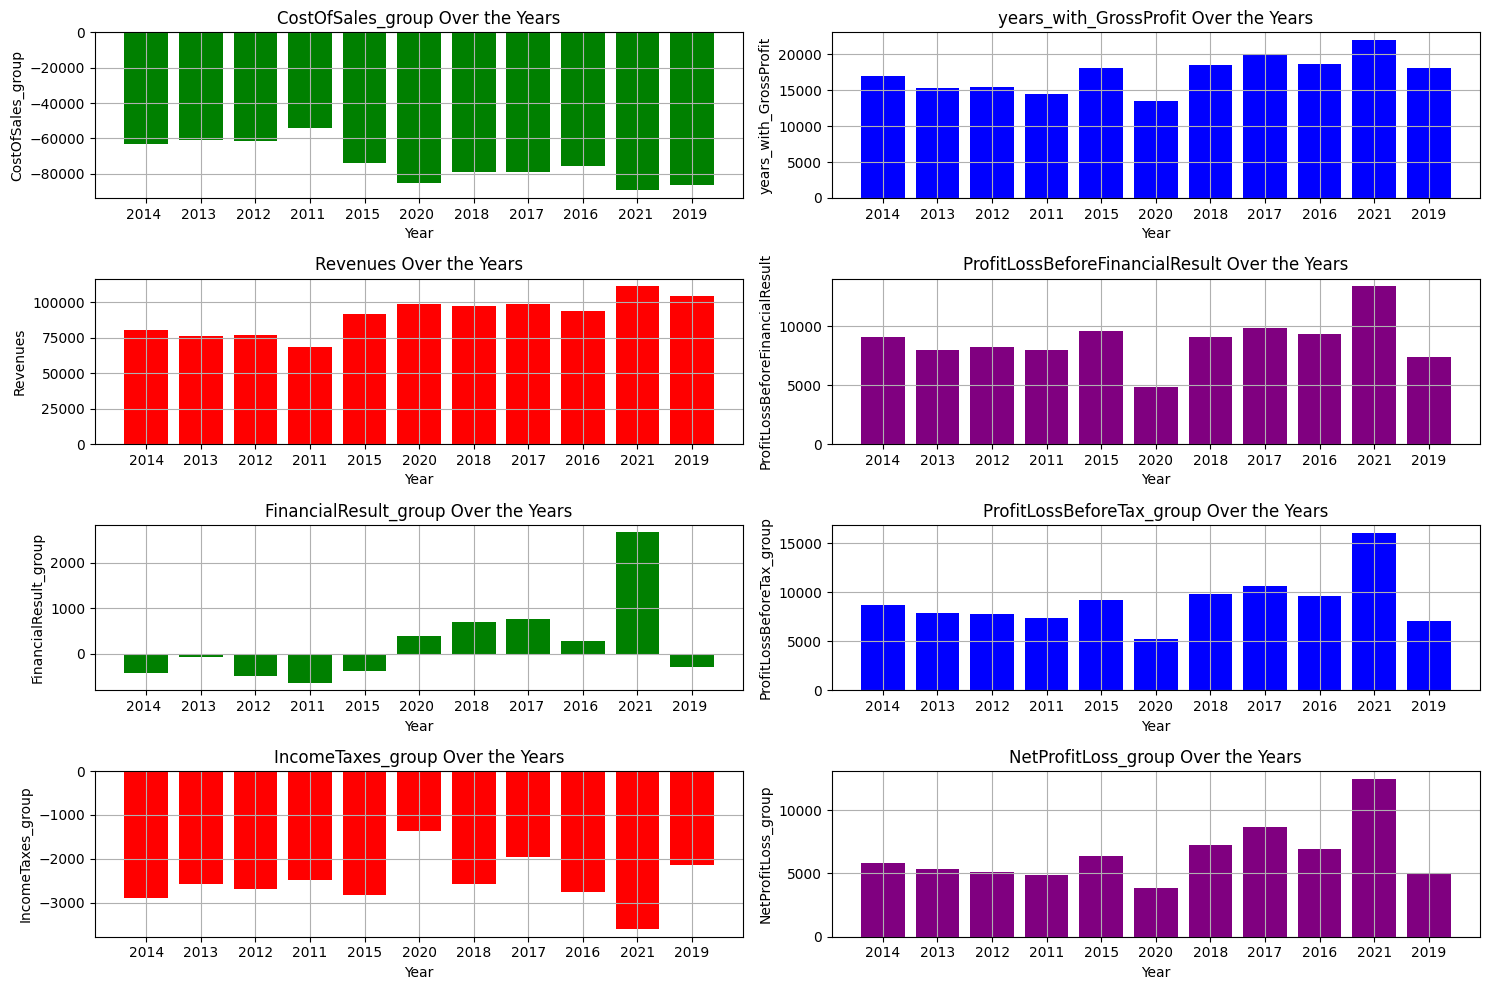

In [ ]:
# Extract relevant data for plotting
revenues_group = []
years_with_revenues = []

years_with_CostOfSales = []
CostOfSales_group = []

years_with_GrossProfit = []
GrossProfit_group = []

years_with_ProfitLossBeforeFinancialResult = []
ProfitLossBeforeFinancialResult_group = []

years_with_FinancialResult=[]
FinancialResult_group= []

years_with_ProfitLossBeforeTax = []
ProfitLossBeforeTax_group= []

years_with_IncomeTaxes = []
IncomeTaxes_group= []
years_with_NetProfitLoss=[]
NetProfitLoss_group= []
for entry in all_year_list:
    for sheet_entry in entry["sheet"]:
        if sheet_entry.get("") == "Revenues":
            years_with_revenues.append(entry["year"])
            print(sheet_entry["Group"])
            revenues_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "CostOfSales":
            years_with_CostOfSales.append(entry["year"])
            CostOfSales_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "GrossProfit":
            years_with_GrossProfit.append(entry["year"])
            GrossProfit_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeFinancialResult":
            years_with_ProfitLossBeforeFinancialResult.append(entry["year"])
            ProfitLossBeforeFinancialResult_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "FinancialResult":
            years_with_FinancialResult.append(entry["year"])
            FinancialResult_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "ProfitLossBeforeTax":
            years_with_ProfitLossBeforeTax.append(entry["year"])
            ProfitLossBeforeTax_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "IncomeTaxes":
            years_with_IncomeTaxes.append(entry["year"])
            IncomeTaxes_group.append(float(sheet_entry["Group"].replace(",", "")))
        if sheet_entry.get("") == "NetProfitLoss":
            years_with_NetProfitLoss.append(entry["year"])
            NetProfitLoss_group.append(float(sheet_entry["Group"].replace(",", "")))

data = {
    "Year": years_with_revenues,
    "Revenues_Auto": revenues_Auto,

    "CostOfSales_Auto": CostOfSales_Auto,

    "GrossProfit_Auto": GrossProfit_Auto,

    "ProfitLossBeforeFinancialResult_Auto": ProfitLossBeforeFinancialResult_Auto,

    "FinancialResult_Auto": FinancialResult_Auto,

    "ProfitLossBeforeTax_Auto": ProfitLossBeforeTax_Auto,

    "IncomeTaxes_Auto": IncomeTaxes_Auto,

    "NetProfitLoss_Auto": NetProfitLoss_Auto
}

df = pd.DataFrame(data)
# Save the DataFrame to a CSV file
csv_file_path = "your_file_path.csv"
df.to_csv(csv_file_path, index=False)

# Create a Google Drive file instance
file_drive = drive.CreateFile({'title': 'your_file_name.csv'})
file_drive.Upload()

# Print the link to the file
print('Created file %s with mimeType %s' % (file_drive['title'], file_drive['mimeType']))

fig, axs = plt.subplots(4,2 ,figsize=(15, 10))

# Plot Revenues
axs[0, 0].bar([f"{year} " for year in years_with_CostOfSales], CostOfSales_group, color='green', label='Group')
axs[0, 0].grid(True)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CostOfSales_group')
axs[0, 0].set_title('CostOfSales_group Over the Years')

# Plot CostOfSales
axs[0, 1].bar([f"{year}" for year in years_with_GrossProfit], GrossProfit_group, color='blue', label='Group')
axs[0, 1].grid(True)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('years_with_GrossProfit')
axs[0, 1].set_title('years_with_GrossProfit Over the Years')

# Plot GrossProfit
axs[1, 0].bar([f"{year}" for year in years_with_revenues], revenues_group, color='red', label='Group')
axs[1, 0].grid(True)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Revenues')
axs[1, 0].set_title('Revenues Over the Years')

# Plot ProfitLossBeforeFinancialResult
axs[1, 1].bar([f"{year}" for year in years_with_ProfitLossBeforeFinancialResult], ProfitLossBeforeFinancialResult_group, color='purple', label='Group')
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('ProfitLossBeforeFinancialResult')
axs[1, 1].set_title('ProfitLossBeforeFinancialResult Over the Years')

# Plot Revenues
axs[2, 0].bar([f"{year} " for year in years_with_revenues], FinancialResult_group, color='green', label='Group')
axs[2, 0].grid(True)
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('FinancialResult_group')
axs[2, 0].set_title('FinancialResult_group Over the Years')

# Plot CostOfSales
axs[2, 1].bar([f"{year}" for year in years_with_revenues], ProfitLossBeforeTax_group, color='blue', label='Group')
axs[2, 1].grid(True)
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('ProfitLossBeforeTax_group')
axs[2, 1].set_title('ProfitLossBeforeTax_group Over the Years')

# Plot GrossProfit
axs[3, 0].bar([f"{year}" for year in years_with_revenues], IncomeTaxes_group, color='red', label='Group')
axs[3, 0].grid(True)
axs[3, 0].set_xlabel('Year')
axs[3, 0].set_ylabel('IncomeTaxes_group')
axs[3, 0].set_title('IncomeTaxes_group Over the Years')

# Plot ProfitLossBeforeFinancialResult
axs[3, 1].bar([f"{year}" for year in years_with_revenues], NetProfitLoss_group, color='purple', label='Group')
axs[3, 1].grid(True)
axs[3, 1].set_xlabel('Year')
axs[3, 1].set_ylabel('NetProfitLoss_group')
axs[3, 1].set_title('NetProfitLoss_group Over the Years')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

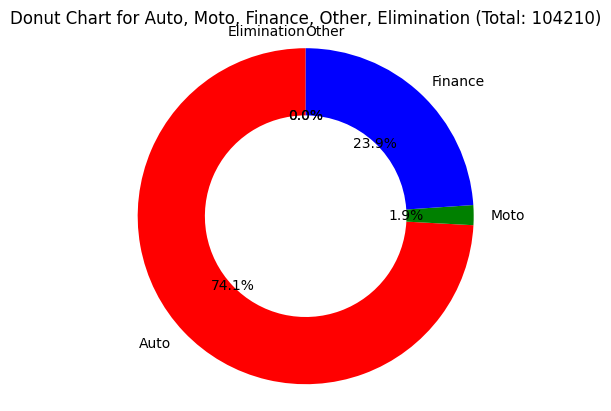

In [ ]:
import matplotlib.pyplot as plt



# Extract relevant data for the donut chart
year_data = all_year_list[0]  # Assuming you want to create the chart for the first year
labels = ['Auto', 'Moto', 'Finance', 'Other', 'Elimination']

# Convert values to integers, subtracting negative values from 'Group'
values = [max(0, int(year_data["sheet"][0][label].replace(",", ""))) for label in labels]

# Calculate the total (subtracting negative values)
total = max(0, int(year_data["sheet"][0]["Group"].replace(",", "")))

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=['red', 'green', 'blue', 'orange', 'purple'])

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Donut Chart for Auto, Moto, Finance, Other, Elimination (Total: {total})')
plt.show()

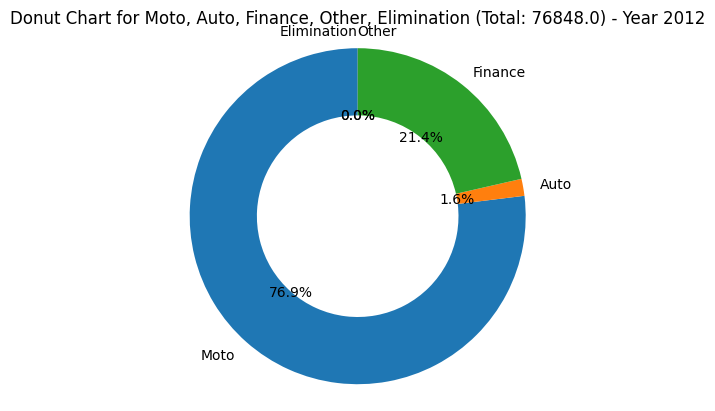

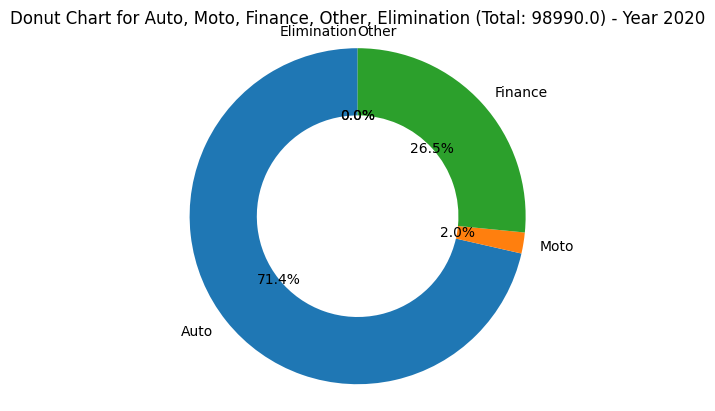

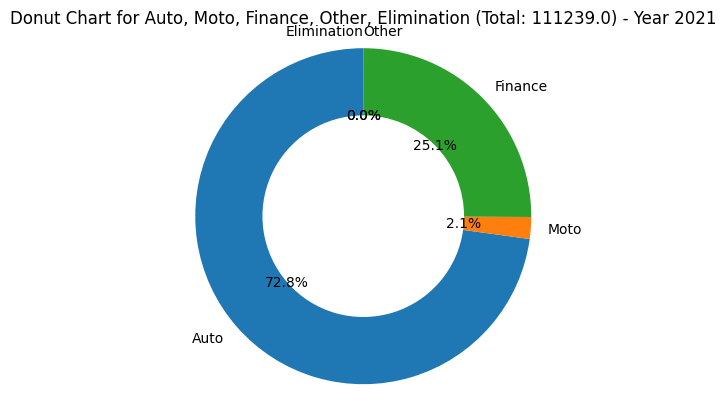

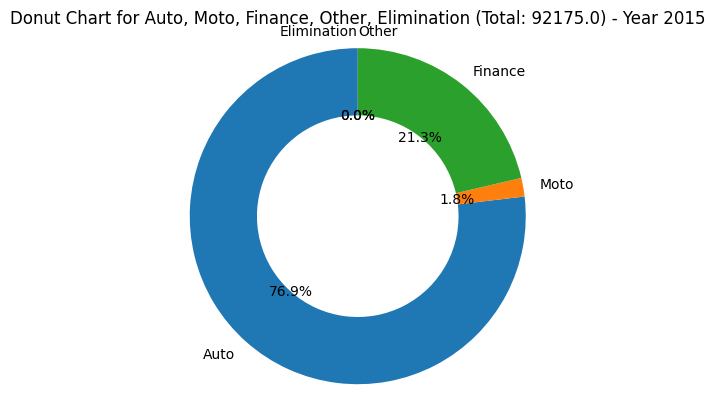

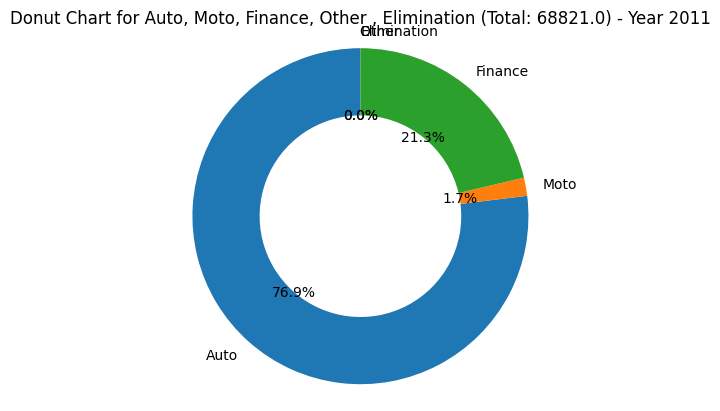

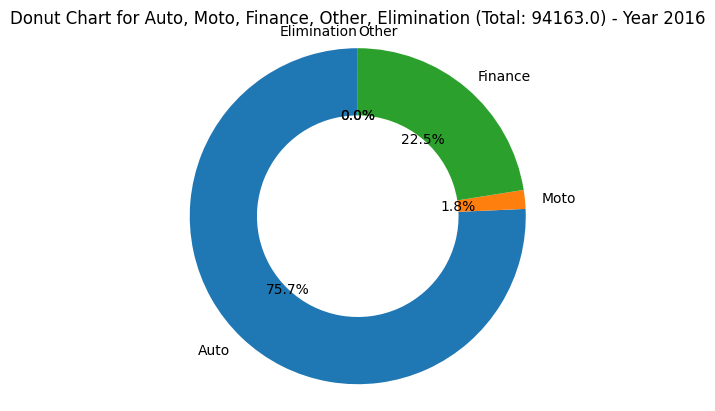

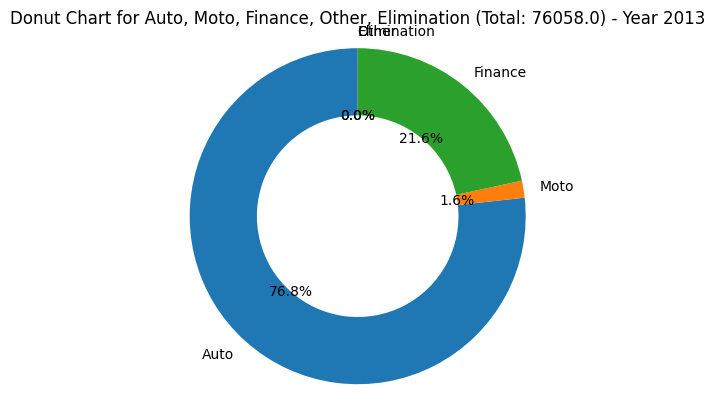

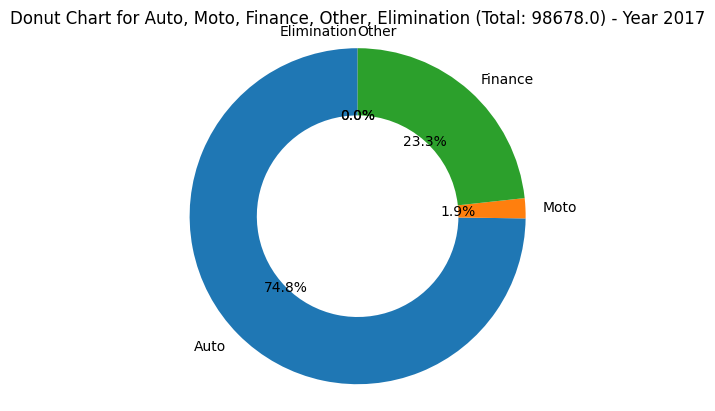

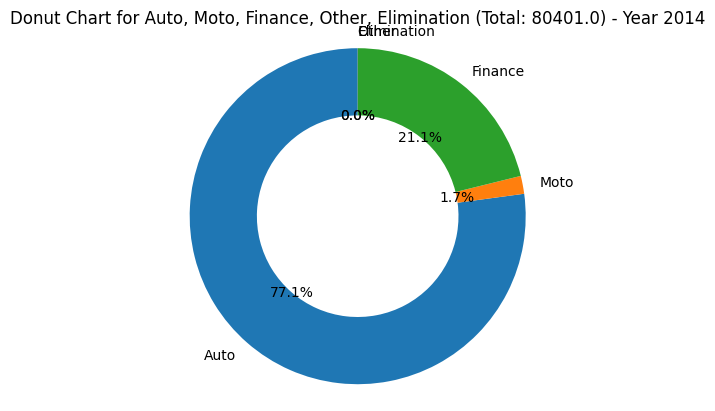

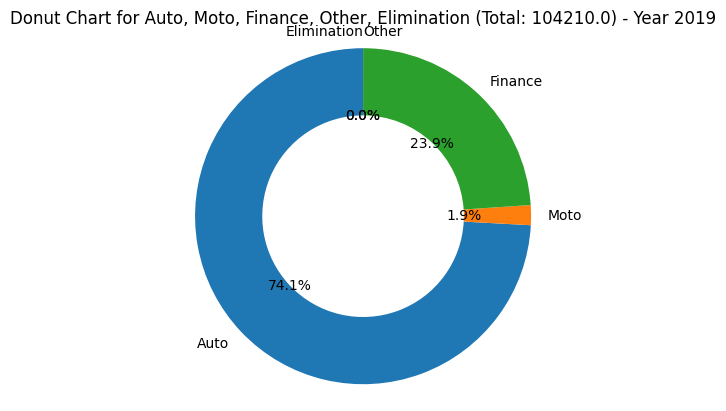

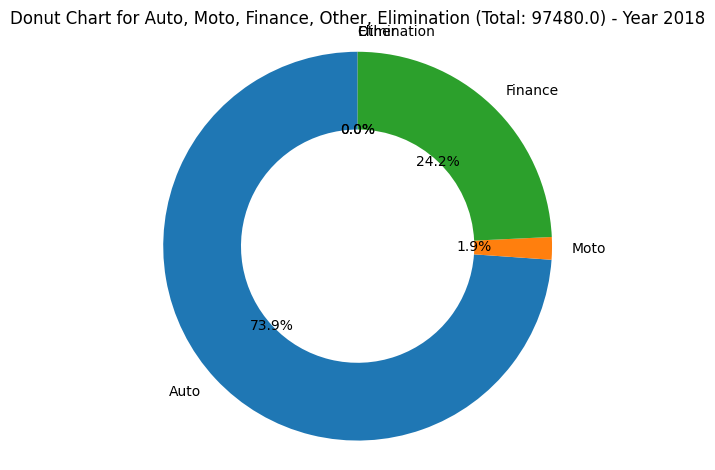

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each year in all_year_list
for i, year_data in enumerate(all_year_list, start=1):
    # Get the labels dynamically based on the available keys in the dictionary
    labels = [label for label in year_data["sheet"][0] if label not in ["", "Group"]]

    # Convert values to integers, subtracting negative values from 'Group'
    values = [max(0, float(year_data["sheet"][0][label].replace(",", ""))) for label in labels]

    # Calculate the total (subtracting negative values)
    total = max(0, float(year_data["sheet"][0]["Group"].replace(",", "")))

    # Create a donut chart
    fig, ax = plt.subplots()

    # Create a donut chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

    # Draw a white circle at the center to create the donut shape
    centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title(f'Donut Chart for {", ".join(labels)} (Total: {total}) - Year {year_data["year"]}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()